# Numpy Things

## 1. meshgrid

Given a vector x and y of some length p and q, it forms a single representation of a vector in a grid form such that the no of rows equls the highest length of any give vector.

In [45]:
x = np.linspace(1, 3, 3)
y = np.linspace(2, 6, 5)

In [46]:
x

array([1., 2., 3.])

In [47]:
y

array([2., 3., 4., 5., 6.])

In [48]:
np.meshgrid(x, y)

[array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]),
 array([[2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.]])]

# Example 1: Plot the vector filed:

$$ \vec{F_{(x,y)}} = x \hat{i} - y\hat{j} $$


Looking into the given equation of vector field, it can be realized that, it it aligned unitely along the basis of $ \vec{i} $ and negatively accross $\vec{j}$, so it can be thought of a vector which has a direction of -45 degree from orgin.


**Let's start with importing what's required**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Forming the scalar quantity accross the basis of our vector.

In [22]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

Magintude of basis $\hat{i}$ and $\hat{j}$

In [20]:
u = 1
v = -1

Plotting the field

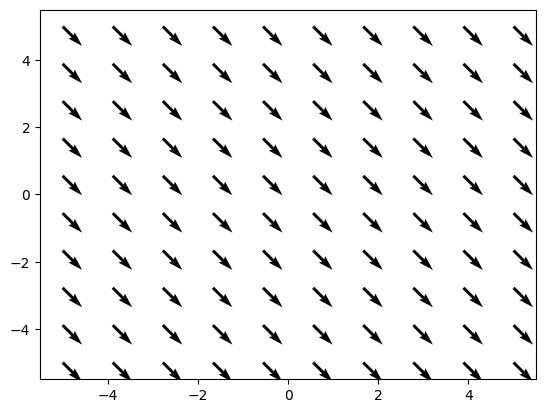

In [21]:
plt.quiver(x, y, u, v)
plt.show()